'''Jumia is a Pan-African technology company that is built around a marketplace, logistics service and payment service.
The logistics service enables the delivery of packages through a network of local partners
while the payment services facilitate the payments of online transactions within Jumia’s ecosystem. 

The goal of this project is to visualise(interactive plot) the last three months and one month of their trading activity on the new york stock exchange using python and relevant libraries. 

In [1]:
!pip install mljar-mercury 

     |████████████████████████████████| 4.5 MB 2.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 97 kB 6.2 MB/s eta 0:00:011
     |████████████████████████████████| 7.9 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 180 kB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Applications/anaconda3/bin/python /private/var/folders/k_/m27wbdv90p77wwx5p2t6f4600000gn/T/pip-standalone-pip-_xu723ji/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/k_/m27wbdv90p77wwx5p2t6f4600000gn/T/pip-build-env-t2uqk3ga/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/sim

In [2]:
!pip install mplfinance

     |████████████████████████████████| 73 kB 495 kB/s eta 0:00:01


In [3]:
!pip install yfinance

     |████████████████████████████████| 59 kB 446 kB/s eta 0:00:01
     |████████████████████████████████| 499 kB 814 kB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 634 kB/s eta 0:00:01��█████████       | 2.9 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 1.7 MB/s eta 0:00:01
  Created wheel for lxml: filename=lxml-4.9.2-cp39-cp39-macosx_10_9_x86_64.whl size=1743460 sha256=5a10be347051aa99cb4128857e7af2ddc0c4b52fc162927e881db56c5b1c5ec1
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/74/7c/5a/e117656a962a1a15a3d2ac1bde4bc6193d62dc5d7e9c51e15e
Successfully built lxml
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautiful

In [28]:
import yfinance as yf
import mplfinance as mpf
import plotly.graph_objects as go

In [9]:
ticker = 'JMIA'

In [10]:
print(f"selected ticker: {ticker}")

selected ticker: JMIA


In [32]:
history = yf.Ticker(ticker).history(period="3mo")
history1 = yf.Ticker(ticker).history(period="1mo")

In [34]:
history.dtypes
history1.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [13]:
history = history.astype(int)
history1 = history1.astype(int)

In [35]:
history.dtypes
history1.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [18]:
print(f"3 months low: {history.Low.min()}")
print(f"3 months high: {history.High.max()}")

3 months low: 2
3 months high: 4


In [36]:
print(f"1 months low: {history1.Low.min()}")
print(f"1 months high: {history1.High.max()}")

1 months low: 3.1500000953674316
1 months high: 4.610000133514404


In [37]:
history.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-12 00:00:00-04:00,4.43,4.465,4.200,4.37,3164400,0.0,0.0
2023-07-13 00:00:00-04:00,4.44,4.505,4.240,4.33,2404400,0.0,0.0
2023-07-14 00:00:00-04:00,4.35,4.370,4.120,4.13,1859900,0.0,0.0
2023-07-17 00:00:00-04:00,4.12,4.455,4.019,4.40,1742400,0.0,0.0
2023-07-18 00:00:00-04:00,4.41,4.610,4.320,4.35,1734900,0.0,0.0


In [29]:
fig = go.Figure()

# Add candlestick trace
fig.add_trace(go.Candlestick(x=history.index,
                             open=history['Open'],
                             high=history['High'],
                             low=history['Low'],
                             close=history['Close'],
                             name='Candlestick'))

fig.add_trace(go.Scatter(x=history.index,
                         y=(history['High'] + history['Low']) / 2,
                         mode='lines',
                         line=dict(color='gray', width=1),
                         name='High-Low Connection'))

# Customize the layout
fig.update_layout(title=f"{ticker} Candlestick Chart with High-Low Connection",
                  xaxis_title="Date",
                  yaxis_title="Price",
                  xaxis_rangeslider_visible=False,
                  showlegend=False,
                  template='plotly_dark')

# Show the plot
fig.show()

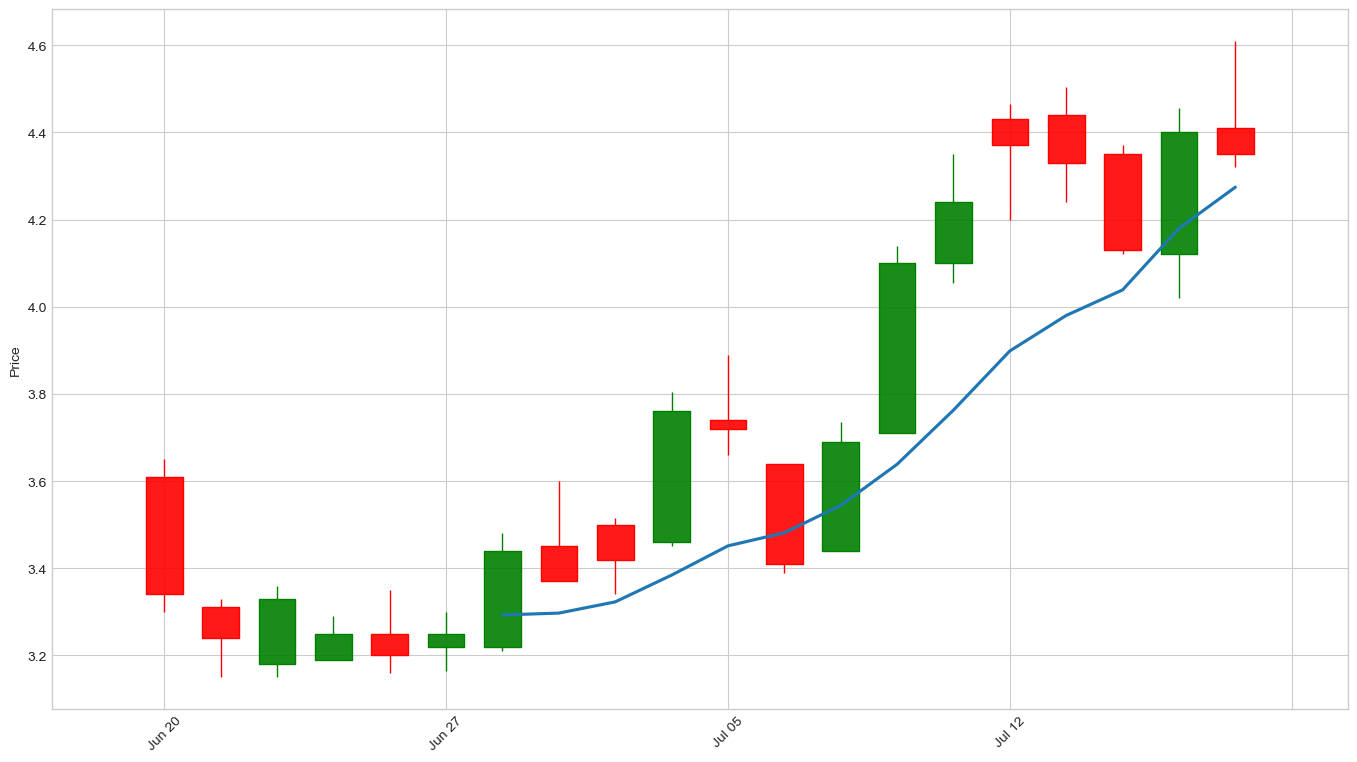

In [39]:
#visualisation showing the trading performance in the last one month.

mc = mpf.make_marketcolors(up='g', down='r', edge='i', wick='i', volume='in')
s = mpf.make_mpf_style(base_mpl_style='seaborn-whitegrid', marketcolors=mc)

# Plot the candlestick chart with the custom style
mpf.plot(history1, type='candle', mav=(7), figsize=(18, 10), style=s)